In [ ]:
#-----------------------------------------------------------2.1 数据操作-----------------------------------------------------------

In [1]:
import mxnet #验证mxnet模块安装成功
print(mxnet.__version__)

1.7.0


In [6]:
from mxnet import np, npx #np为numpy模块，npx 为numpy_extension模块
npx.set_np()
x=np.arange(12)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
from mxnet import np, npx
x=np.arange(12)
#x.shape
#x.size
X=x.reshape(3,4) #目标形状：（高度，宽度）
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [8]:
Y=x.reshape(-1,4) #知道宽度后，高度自动计算得出，并可通过-1调用
Y

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [9]:
Z=x.reshape(3,-1)
Z

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [10]:
np.zeros((2,3,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [12]:
np.ones((2,3,4))

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

In [13]:
#创建shape=(3,4)的张量，每个元素从均值0、标准差1的标准高斯分布（正态分布）中随机采样。通常用于随机初始化参数值
np.random.normal(0,1,size=(3,4)) 

array([[ 2.2122064 ,  1.1630787 ,  0.7740038 ,  0.4838046 ],
       [ 1.0434403 ,  0.29956347,  1.1839255 ,  0.15302546],
       [ 1.8917114 , -1.1688148 , -1.2347414 ,  1.5580711 ]])

In [14]:
np.array([[2,1,4,3],[1,2,3,4],[4,3,2,1]]) #最外层的列表对应轴0，内层列表对应轴1

array([[2., 1., 4., 3.],
       [1., 2., 3., 4.],
       [4., 3., 2., 1.]])

In [15]:
#形状相同的张量，通过标准运算符实现按元素运算
x=np.array([1,2,4,8])
y=np.array([2,2,2,2])
x+y,x-y,x*y,x/y,x**y #逗号表示具有5个元素的元组，每个元素是按元素操作的结果

(array([ 3.,  4.,  6., 10.]),
 array([-1.,  0.,  2.,  6.]),
 array([ 2.,  4.,  8., 16.]),
 array([0.5, 1. , 2. , 4. ]),
 array([ 1.,  4., 16., 64.]))

In [16]:
np.exp(x)#张量按元素求幂

array([2.7182817e+00, 7.3890562e+00, 5.4598148e+01, 2.9809580e+03])

In [17]:
X=np.arange(12).reshape(3,4)
Y=np.array([[2,1,4,3],[1,2,3,4],[4,3,2,1]])
np.concatenate([X,Y],axis=0),np.concatenate([X,Y],axis=1) #concatenate连结多个张量

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]]),
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [18]:
X==Y #两张量对应相等置1，否则置0

array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])

In [19]:
X.sum() #张量所有元素求和，产生一个单元素张量

array(66.)

In [20]:
#形状不同的张量广播后，实现按元素运算
a=np.arange(3).reshape(3,1)
b=np.arange(2).reshape(1,2)
a,b

(array([[0.],
        [1.],
        [2.]]),
 array([[0., 1.]]))

In [21]:
a+b #a、b均广播为3x2矩阵后，按元素运算

array([[0., 1.],
       [1., 2.],
       [2., 3.]])

In [22]:
X[-1],X[1:3] #张量的索引和切片

(array([ 8.,  9., 10., 11.]),
 array([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]]))

In [24]:
X[1,2]=9 #将元素写入张量指定索引位置
X

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  9.,  7.],
       [ 8.,  9., 10., 11.]])

In [25]:
X[0:2,:]=12 #对X第1、2行元素均赋值12
X

array([[12., 12., 12., 12.],
       [12., 12., 12., 12.],
       [ 8.,  9., 10., 11.]])

In [26]:
before=id(Y) #id()函数给出内存中引用对象的确切地址
Y=Y+X
id(Y)==before #操作非原地执行，Y指向了新的地址

False

In [27]:
Z=np.zeros_like(Y) #zero_like()分配与Y形状相同的全0块
print('id(Z):',id(Z))
Z[:]=X+Y #使用切片表示法将操作结果分配给先前分配的数组Z，Y可以保留旧有引用地址
print('id(Z):',id(Z))

id(Z): 139783973118912
id(Z): 139783973118912


In [31]:
before=id(X) #id()函数给出内存中引用对象的确切地址
X+=Y
id(X)==before #X指向未改变
#type(X) #mxnet.numpy.ndarray

True

In [29]:
#两类张量转换，转化后的结果不共享内存
A=X.asnumpy() #将深度学习框架的张量X转换为Numpy张量A
B=np.array(A) #将Numpy张量A转换为深度学习框架mxnet的张量B
type(A),type(B)

(numpy.ndarray, mxnet.numpy.ndarray)

In [32]:
a=np.array([3.5]) #将大小为1的张量转换为python标量
a,a.item(),float(a),int(a)

(array([3.5]), 3.5, 3.5, 3)

In [ ]:
#-----------------------------------------------------------2.2 数据预处理-----------------------------------------------------------
#1.使用pandas预处理原始数据
#2.pandas软件包是python中常用的数据分析工具，pandas可以与张量兼容
#3.pandas处理缺失数据可视情况采用插值法和删除法

In [33]:
#准备数据集
import os
os.makedirs(os.path.join('..','data'),exist_ok=True)
data_file=os.path.join('..','data','house_tiny.csv')
with open(data_file,'w') as f:
    f.write('NumRooms,Alley,Price\n') #列名
    f.write('NA,Pave,127500\n') #每行表示一个数据样本
    f.write('2,NA,106000\n') #NA表示缺失值
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [34]:
#读取数据集
!pip install pandas
import pandas as pd
data=pd.read_csv(data_file)
print(data)

Looking in indexes: http://mirrors.cloud.aliyuncs.com/pypi/simple/
   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [35]:
#处理缺失值NA方法包括插值法和删除法等，这里采用插值法
inputs,outputs=data.iloc[:,0:2],data.iloc[:,2] #通过位置索引 iloc 将data分为inputs和outputs两部分
inputs=inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [40]:
inputs=pd.get_dummies(inputs,dummy_na=True) #将二值类别列转换为两列，Alley_Pave和Alley_nan
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [41]:
#数据张量化
from mxnet import np
X,y=np.array(inputs.values),np.array(outputs.values) #将之前的数值类型inputs和outputs转换为张量类型，便于使用张量函数对其进行处理
X,y

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

In [ ]:
#-----------------------------------------------------------2.3 线性代数-----------------------------------------------------------

In [2]:
from mxnet import np,npx
npx.set_np()
x=np.array(3.0) #只有一个元素的张量表示标量
y=np.array(2.0)
x+y,x*y,x/y,x**y

(array(5.), array(6.), array(1.5), array(9.))

In [3]:
x=np.arange(4)
print(x)
print(type(x))
print(x[3])
print(len(x)) #通过python内置len访问张量长度
print(x.shape)

[0. 1. 2. 3.]
<class 'mxnet.numpy.ndarray'>
3.0
4
(4,)


In [4]:
A=np.arange(20).reshape(5,4)
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [5]:
A.T

array([[ 0.,  4.,  8., 12., 16.],
       [ 1.,  5.,  9., 13., 17.],
       [ 2.,  6., 10., 14., 18.],
       [ 3.,  7., 11., 15., 19.]])

In [6]:
X=np.arange(24).reshape(2,3,4)
X

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

In [7]:
A=np.arange(20).reshape(5,4)
B=A.copy() #通过分配新内存，将A的一个副本分配给B
A,A+B #形状相同张量按元素执行加法

(array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]]),
 array([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]]))

In [8]:
A*B #形状相同张量按元素相乘

array([[  0.,   1.,   4.,   9.],
       [ 16.,  25.,  36.,  49.],
       [ 64.,  81., 100., 121.],
       [144., 169., 196., 225.],
       [256., 289., 324., 361.]])

In [9]:
a=2
X=np.arange(24).reshape(2,3,4)
X

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.],
        [20., 21., 22., 23.]]])

In [10]:
a+X,(a*X).shape #张量乘以或加上一个标量，不改变张量形状，张量每个元素都将与标量相乘或相加

(array([[[ 2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.]],
 
        [[14., 15., 16., 17.],
         [18., 19., 20., 21.],
         [22., 23., 24., 25.]]]),
 (2, 3, 4))

In [11]:
x=np.arange(4)
x,x.sum()

(array([0., 1., 2., 3.]), array(6.))

In [15]:
#对A降维求和
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [12]:
A.shape,A.sum() #调用求和函数沿着所有轴降低张量维度，使其变为一个标量

((5, 4), array(190.))

In [13]:
A_sum_axis0=A.sum(axis=0) #指定张量沿0轴通过求和降低维度。求和张量所有行元素降维，输入轴0的维数在输出形状中消失
A_sum_axis0,A_sum_axis0.shape #所有列，分别沿着轴0求和(各行元素加到第一行)，轴0降维(轴0的长度消失)

(array([40., 45., 50., 55.]), (4,))

In [14]:
A_sum_axis1=A.sum(axis=1) #指定张量沿1轴通过求和降低维度。求和张量所有列元素降维，输入轴1的维数在输出形状中消失
A_sum_axis1,A_sum_axis1.shape #所有行，分别沿着轴1求和(各列元素加到第一列)，轴1降维(轴1的长度消失)

(array([ 6., 22., 38., 54., 70.]), (5,))

In [16]:
A.sum(axis=[0,1]) #沿着行和列求和，等价于所有元素求和

array(190.)

In [17]:
A.mean(),A.sum()/A.size #求平均值

(array(9.5), array(9.5))

In [18]:
A.mean(axis=0),A.sum(axis=0)/A.shape[0] #沿指定轴0计算平均值

(array([ 8.,  9., 10., 11.]), array([ 8.,  9., 10., 11.]))

In [19]:
#非降维求和
A

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [21]:
sum_A=A.sum(axis=1,keepdims=True) #沿着轴1求和(各列元素分别加到第1列)，并保持轴数不变（仍有两个轴，轴1不消失，长度用1代替）
sum_A,sum_A.shape

(array([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]]),
 (5, 1))

In [22]:
A/sum_A #张量A求和后轴数不变，可通过广播将A除以A_sum

array([[0.        , 0.16666667, 0.33333334, 0.5       ],
       [0.18181819, 0.22727273, 0.27272728, 0.3181818 ],
       [0.21052632, 0.23684211, 0.2631579 , 0.28947368],
       [0.22222222, 0.24074075, 0.25925925, 0.2777778 ],
       [0.22857143, 0.24285714, 0.25714287, 0.27142859]])

In [24]:
A.cumsum(axis=0) #使用cumsum()沿着0轴计算A累计元素和，不会降维

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  6.,  8., 10.],
       [12., 15., 18., 21.],
       [24., 28., 32., 36.],
       [40., 45., 50., 55.]])

In [25]:
#点积:两向量相同位置按元素乘积的和
y=np.ones(4)
x,y,np.dot(x,y)

(array([0., 1., 2., 3.]), array([1., 1., 1., 1.]), array(6.))

In [26]:
#矩阵-向量积
A.shape,x.shape,np.dot(A,x)

((5, 4), (4,), array([ 14.,  38.,  62.,  86., 110.]))

In [27]:
#矩阵乘法
B=np.ones(shape=(4,3))
np.dot(A,B)

array([[ 6.,  6.,  6.],
       [22., 22., 22.],
       [38., 38., 38.],
       [54., 54., 54.],
       [70., 70., 70.]])

In [28]:
#范数：L2范数：向量元素平方和的平方根；L1范数：向量元素绝对值之和
u=np.array([3,-4])
np.linalg.norm(u) #计算向量的L2范数

array(5.)

In [29]:
np.abs(u).sum() #计算向量的L1范数

array(7.)

In [2]:
#mxn矩阵的Frobenius范数：矩阵元素平方和的平方根
from mxnet import np,npx
npx.set_np()
np.linalg.norm(np.ones((4,9)))

array(6.)

In [ ]:
#-----------------------------------------------------------2.4 微积分-----------------------------------------------------------

In [24]:
#导数和微分
%matplotlib inline
from IPython import display
from mxnet import np,npx
from d2l import mxnet as d2l

npx.set_np()

def f(x):
    return 3*x**2-4*x

def numerical_lim(f,x,h):
    return (f(x+h)-f(x))/h

h=0.1
for i in range(5):
    print(f'h={h:.5f},numerical limit={numerical_lim(f,1,h):.5f}')
    h*=0.1

h=0.10000,numerical limit=2.30000
h=0.01000,numerical limit=2.03000
h=0.00100,numerical limit=2.00300
h=0.00010,numerical limit=2.00030
h=0.00001,numerical limit=2.00003


In [25]:
def use_svg_display(): #@save
    """此函数指定matplotlib软件包输出svg图表以获得更清晰的图像
       #@save是特殊标记，表示将对应函数、类或语句保存于d2l包中，此后无需重新定义就可直接调用
    """
    display.set_matplotlib_formats('svg')

In [26]:
def set_figsize(figsize=(3.5,2.5)): #@save
    """此函数用于设置图表大小
    
    """
    use_svg_display()
    d2l.plt.rcParams['figure.figsize']=figsize #rcParams指定图片像素。直接使用d2l.plt是因为对应的导入语句已标记为保存到d2l包中

In [27]:
#@save
def set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend):
    """此函数用于设置由matplotlib生成图表的轴的属性"""
    axes.set_xlabel(xlabel) #设置坐标轴名称 
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim) #设置横纵坐标轴范围 
    axes.set_ylim(ylim)
    axes.set_xscale(xscale) #设置横纵坐标轴刻度大小
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend) #图例
    axes.grid() #配置网格线


In [28]:
#@save
def plot(X,Y=None,xlabel=None,ylabel=None,legend=None,xlim=None,ylim=None,xscale='linear',yscale='linear',
        fmts=('-','m--','g-.','r:'),figsize=(3.5,2.5),axes=None):
    """绘制数据点"""
    if legend is None:
        legend=[]
        
    set_figsize(figsize)
    axes=axes if axes else d2l.plt.gca()
    
    #如果x有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X,"ndim") and X.ndim==1 or isinstance(X,list)
               and not hasattr(X[0],"__len__"))
    
    if has_one_axis(X):
        X=[X]
    if Y is None:
        X,Y=[[]]*len(X),X
    elif has_one_axis(Y):
        Y=[Y]
    if len(X)!=len(Y):
        X=X*len(Y)
    axes.cla()
    for x,y,fmt in zip(X,Y,fmts):
        if len(x):
            axes.plot(x,y,fmt)
        else:
            axes.plot(y,fmt)
    set_axes(axes,xlabel,ylabel,xlim,ylim,xscale,yscale,legend)
    

/tmp/ipykernel_472117/3886814031.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


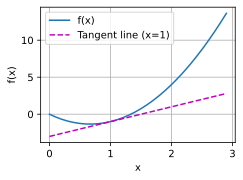

In [29]:
#利用上述绘图函数，绘制函数f(x)及其在x=1处切线
x=np.arange(0,3,0.1)
plot(x,[f(x),2*x-3],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

In [ ]:
#-----------------------------------------------------------2.5 自动微分-----------------------------------------------------------

In [30]:
#标量函数y关于向量x的梯度结果，是与x形状相同的向量
from mxnet import autograd,np,npx
npx.set_np()
x=np.arange(4.0)
x

array([0., 1., 2., 3.])

In [31]:
x.attach_grad() #调用attach_grand为一个张量的梯度分配内存
x.grad #x的梯度初始值为0，可通过'grad'访问

array([0., 0., 0., 0.])

In [36]:
with autograd.record(): #将代码放到autograd.record中，建立计算图
    y=2*np.dot(x,x) #计算x与x的点积，x是长度为4的向量
y.backward() #调用反向传播函数，自动计算y关于x每个分量的梯度
x.grad

array([ 0.,  4.,  8., 12.])

In [35]:
with autograd.record():
    y=x.sum()
y.backward()
x.grad

array([1., 1., 1., 1.])

In [37]:
#非标量变量的反向传播
#对向量y(关于x的函数)调用backward时，将通过对y中元素求和来创建一个新的标量变量，然后计算这一标量变量相对于x的梯度
with autograd.record(): #建立计算图
    y=x*x #y是向量
y.backward() 
x.grad

array([0., 2., 4., 6.])

In [43]:
#分离计算
with autograd.record():
    y=x*x
    u=y.detach() #u与y具有相同的值，但未保留y在计算图中的信息(梯度不会向后流经u到x)
    z=u*x
z.backward() #通过反向传播函数backward()计算z关于每个变量的偏导数。对于x，这里计算的是z=u*x关于x的偏导数，而不是z=x*x*x关于x的偏导数
x.grad==u  #通过grad属性访问计算得到的x关于x偏导数

array([ True,  True,  True,  True])

In [44]:
y.backward() #根据计算图中y的计算模型，仍可以在y上调用反向传播，得到y=x*x关于x的导数
x.grad==2*x

array([ True,  True,  True,  True])

In [45]:
#python控制流的梯度计算：通过python控制流构建计算图，在此基础上计算其中变量的梯度
def f(a):
    b=a*2
    while np.linalg.norm(b)<1000:
        b=b*2
    if b.sum()>0:
        c=b
    else:
        c=100*b
    return c

In [46]:
a=np.random.normal()
a.attach_grad()
with autograd.record():
    d=f(a)
d.backward()
a.grad==d/a

array(True)

In [ ]:
#-----------------------------------------------------------2.6 概率-----------------------------------------------------------

In [1]:
%matplotlib inline
import random
from mxnet import np,npx
from d2l import mxnet as d2l
npx.set_np()

In [4]:
fair_probs=[1.0/6]*6
np.random.multinomial(1,fair_probs) #随机抽样实验模拟

array([0, 0, 1, 0, 0, 0], dtype=int64)

In [5]:
np.random.multinomial(10,fair_probs) #用深度学习框架函数同时抽取同一分布的多个样本（10个），输出不同样本值出现的次数

array([1, 1, 1, 3, 4, 0], dtype=int64)

In [6]:
counts=np.random.multinomial(1000,fair_probs).astype(np.float32) #模拟1000次骰子投掷实验，返回每个不同值出现次数
counts/1000 #计算不同结果出现的相对概率(结果接近真实概率1/6=0.167)

array([0.162, 0.149, 0.179, 0.169, 0.163, 0.178])